## Orbit reponse measurements at the Fermilab Booster
This notebook also can be downloaded or executed at MS Azure cloud:
<a href=https://notebooks.azure.com/library/fnal>https://notebooks.azure.com/library/fnal</a> (press 'Clone and run' button).

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
from io import StringIO

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.resources import INLINE
output_notebook(resources=INLINE)

%matplotlib inline
font = {'weight':'normal','size':14, 'family':'Times New Roman'}
matplotlib.rc('font', **font)

def readDATA(url):
    # ORM file content as a string
    txt = urlopen(url).read().decode()
    # make stream out of string (it's easier to read then):
    DATA=StringIO(txt)

    print(DATA.readline().strip(' #\n'))
    line = DATA.readline()
    line = line.replace('Dipole current', 'Dipole_current')
    line = line.replace('Cycle time', 'Cycle_time')
    line = line.replace('B:HP', 'H')
    line = line.replace('B:VP', 'V')
    line = line.replace('03LU', 'U3L')
    line = line.replace('06LU', 'U6L')
    line = line.replace('07LU', 'U7L')

    cols = []
    for col in line.split():
        if col.startswith('H') or col.startswith('V'):
            # converting H03S to HS03 and H03L to HL03
            cols.append(col[0] + col[-1] + col[1:-1])
        else:
            cols.append(col)

    # converting B:HL1 to HL01
    df = pd.read_table(DATA, names=cols, delim_whitespace=True)
    df['Dipole'] = df['Dipole'].str.replace('B:', '')

    Dipoles = df['Dipole'].values
    df['Dipole'] = [
        Dipole[:2] + '{:02.0f}'.format(int(Dipole[2:])) for Dipole in Dipoles
    ]
    df['Dipole_base_name'] = df['Dipole'].str[1:]

    return df

Loading BokehJS ...

## Loading orbit response measurements

In [3]:
#df_DATA = readDATA('https://apetrenko.blob.core.windows.net/fnal-booster-orm/test.txt')
#df_DATA = readDATA('https://apetrenko.blob.core.windows.net/fnal-booster-orm/2011-12-20_ORM_3.txt')
df1 = readDATA('https://apetrenko.blob.core.windows.net/fnal-booster-orm/2016-11-22_ORM_H.txt')
df2 = readDATA('https://apetrenko.blob.core.windows.net/fnal-booster-orm/2016-11-22_ORM_V.txt')
df_DATA = pd.concat([df1, df2], ignore_index=True)
df_DATA.head(3)

ORBIT RESPONSE MEASUREMENTS, breakpoints= 2.3 6 10  ms,  22-NOV-2016 08:47:23, scale=1 1 1
ORBIT RESPONSE MEASUREMENTS, breakpoints= 2.3 6 10  ms,  22-NOV-2016 10:42:31, scale=1 1 1


Dipole  Dipole_current  Cycle_time       HL01      HS01      HL02      HS02  \
0   HL01               0    0.002000  13.962211  5.575179  1.700992  2.871440   
1   HL01               0    0.002353   3.769405  4.224651  0.957711 -0.914107   
2   HL01               0    0.002740   2.295011  2.206743 -0.304484 -3.206419   

       HL03      HS03      HL04        ...             VL22      VS22  \
0 -0.381798 -1.788748  2.184691        ...        -1.285112 -1.657142   
1 -2.790260 -5.057011  0.674450        ...        -0.108736 -0.587362   
2 -4.038198 -6.859596 -0.369746        ...        -0.043494 -0.413259   

       VL23      VS23      VL24      VS24       VLU3      VLU6      VLU7  \
0  0.043494  1.503810  0.326237  2.008495   6.125813  1.433393  1.482146   
1 -1.700992  1.285112  0.783352  5.150647  10.344858  1.921721  3.153100   
2 -1.591402  1.154067  0.609131  4.963619   9.194995  1.677325  2.930072   

   Dipole_base_name  
0               L01  
1               L01  
2               L01  

[3 rows x 106 columns]

In [4]:
df_DATA.tail(3)

Dipole  Dipole_current  Cycle_time      HL01      HS01      HL02  \
15357   VS24               4    0.003863  3.273654  4.041992  1.132238   
15358   VS24               4    0.004226  2.737973  3.251234  1.394413   
15359   VS24               4    0.004583  2.250864  2.339183  1.328821   

           HS02      HL03      HS03      HL04        ...             VL22  \
15357 -1.132238 -2.174314 -2.715756  1.481922        ...        -0.435018   
15358 -0.239229 -1.818848 -1.569498  1.481922        ...        -0.456777   
15359  0.217479 -1.700882 -1.066769  1.306965        ...        -0.478538   

           VS22      VL23      VS23      VL24      VS24       VLU3      VLU6  \
15357  1.219574  3.408379  2.162646  0.217479  2.471859 -10.518688  4.153835   
15358  1.285112  3.385901  2.140607  0.478537  2.074525  -3.905494  3.626373   
15359  1.328821  3.408379  2.008495  1.023137  1.810699   1.023137  3.103478   

           VLU7  Dipole_base_name  
15357 -0.194055               S24  
15358 -0.485212               S24  
15359 -0.655134               S24  

[3 rows x 106 columns]

This table contains different cycle times:

In [5]:
Cycle_times = df_DATA.Cycle_time.drop_duplicates().values
print('t = ', end=""); print(Cycle_times)
Dipole_current = list(df_DATA.Dipole_current.drop_duplicates().values)
print('I = ', end=""); print(Dipole_current)

t = [ 0.002       0.00235269  0.00273989  0.00312051  0.00349486  0.00386319
  0.00422578  0.00458289]
I = [0, -2, -4, 2, 4]


Let's select one time point:

In [6]:
t = Cycle_times[3]
#t = Cycle_times[6]

df_DATA_t = df_DATA[df_DATA.Cycle_time == t]
df_DATA_t.head(5)

Dipole  Dipole_current  Cycle_time      HL01      HS01      HL02      HS02  \
3    HL01               0    0.003121  2.693547  2.960580  0.043494 -2.737973   
11   HL01               0    0.003121  2.493995  2.626963 -0.173980 -2.915994   
19   HL01               0    0.003121  2.295011  2.560447 -1.132238 -3.973691   
27   HL01               0    0.003121  2.361279  2.516139 -0.195729 -2.960580   
35   HL01              -2    0.003121  3.882785  4.178913 -0.065241 -3.453365   

        HL03      HS03          HL04        ...             VL22      VS22  \
3  -3.487010 -5.433075  3.479910e-01        ...         0.065241 -0.173980   
11 -3.716836 -5.789501  8.698814e-02        ...         0.130483 -0.239229   
19 -4.363546 -5.741750 -4.785377e-01        ...        -0.935908  0.065241   
27 -3.770136 -5.885219 -8.930000e-08        ...         0.086988 -0.304484   
35 -2.790260 -3.543456  1.722923e+00        ...         0.217479 -0.391502   

        VL23      VS23      VL24      VS24      VLU3      VLU6      VLU7  \
3  -1.219575  0.979517  0.391502  4.523182  5.197558  1.409023  2.461365   
11 -1.263263  0.914106  0.304484  4.454095  5.315114  1.262880  2.436769   
19 -1.635224  1.285112 -0.347991  3.950947  4.638595  0.727983  2.191174   
27 -1.306965  0.826928  0.304484  4.500140  5.338674  1.116862  2.313891   
35 -1.219575  0.761568  0.304484  4.477111  5.338674  1.384656  2.240242   

    Dipole_base_name  
3                L01  
11               L01  
19               L01  
27               L01  
35               L01  

[5 rows x 106 columns]

## Central orbit:

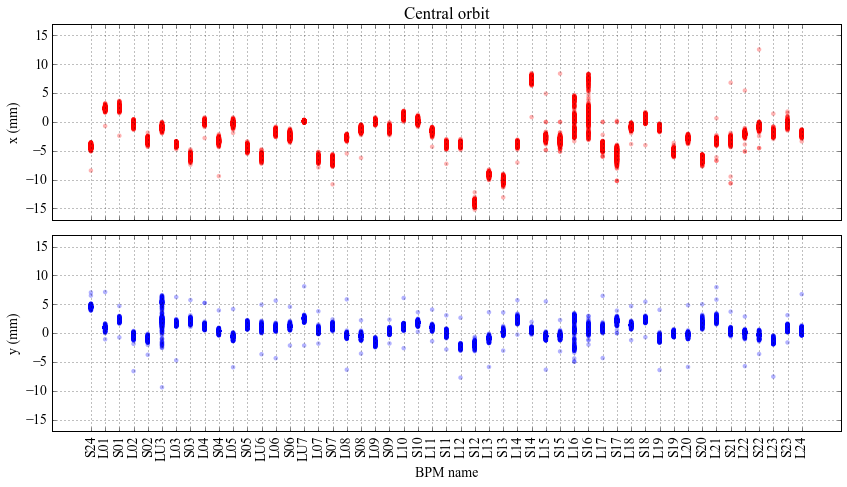

In [7]:
url = 'https://apetrenko.blob.core.windows.net/misc/BoosterBPMs.txt'
txt = urlopen(url).read().decode()
df_BPMs = pd.read_table(StringIO(txt), names=['BPM', 's'], delim_whitespace=True)
BPMs = list(df_BPMs.BPM.values)
s_BPM = list(df_BPMs.s.values)

xBPMs = ['H'+col for col in BPMs]
yBPMs = ['V'+col for col in BPMs]

df_I0 = df_DATA_t[df_DATA_t.Dipole_current == 0]

dfx = pd.DataFrame(df_I0, columns=xBPMs)
dfy = pd.DataFrame(df_I0, columns=yBPMs)
x_ticks = range(len(BPMs))

plt.rcParams["figure.figsize"] = [12,7]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_title('Central orbit')
ax1.set_ylabel('x (mm)')
ax2.set_ylabel('y (mm)')
ax2.set_xlabel('BPM name')
for i, row in dfx.iterrows():
    ax1.scatter(x_ticks, row.values, color='red',
                alpha=0.3, s=20, edgecolor = 'none')
    ax1.set_xticks(x_ticks)
for i, row in dfy.iterrows():
    ax2.scatter(x_ticks, row.values, color='blue',
                alpha=0.3, s=20, edgecolor = 'none')
    ax2.set_xticks(x_ticks)

ax2.set_xticklabels(BPMs, rotation='vertical') #, fontsize=16
ax1.set_ylim(-17,+17)
ax2.set_ylim(-17,+17)
ax1.grid()
ax2.grid()
plt.tight_layout()
plt.show(fig)
#for row in dfx.rows:
#   print row['c1'], row['c2']
#dfx.head()

### Central orbit at specific BPM:

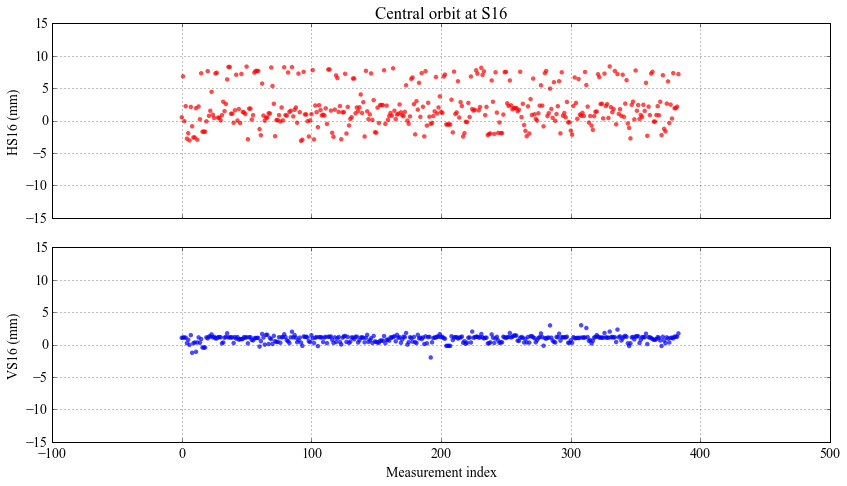

In [8]:
#BPM = 'S24'
#BPM = 'L24'
#BPM = 'L07'
#BPM = 'LU3'
#BPM = 'L16'
BPM = 'S16'

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_title('Central orbit at '+BPM)
ax1.set_ylabel('H'+BPM+' (mm)')
ax2.set_ylabel('V'+BPM+' (mm)')
ax2.set_xlabel('Measurement index')
x = df_I0['H'+BPM].values
y = df_I0['V'+BPM].values

ax1.scatter(range(len(x)), x, color='red',
            alpha=0.7, s=20, edgecolor = 'none')
ax2.scatter(range(len(y)), y, color='blue',
            alpha=0.7, s=20, edgecolor = 'none')
ax1.set_ylim([-15,+15])
ax2.set_ylim([-15,+15])
ax1.grid()
ax2.grid()
plt.tight_layout()
plt.show(fig)

Since the central orbit is measured many times we can mark the outlier points for the central orbit easily:

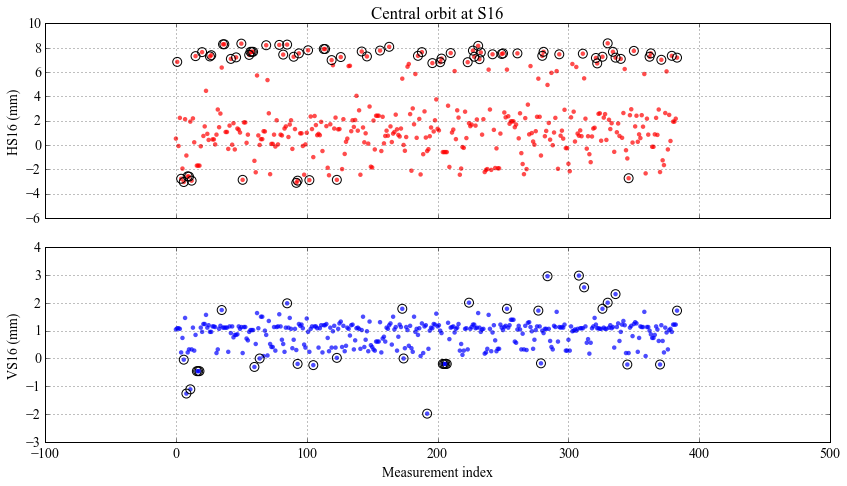

In [9]:
df = df_I0.copy()

outlier_cols = []
for bpm in xBPMs+yBPMs:
    mean = df[bpm].mean()
    std = df[bpm].std()
    df[bpm+'outlier'] = ((df[bpm]-mean < -1.5*std) | (df[bpm]-mean > 1.5*std))
    outlier_cols.append(bpm+'outlier')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_title('Central orbit at '+BPM)
ax1.set_ylabel('H'+BPM+' (mm)')
ax2.set_ylabel('V'+BPM+' (mm)')
ax2.set_xlabel('Measurement index')

df['meas_idx'] = range(len(df))
df_xout = df[ df['H'+BPM+'outlier']==True ]
df_yout = df[ df['V'+BPM+'outlier']==True ]

ax1.scatter(df.meas_idx, df['H'+BPM], color='red',
            alpha=0.7, s=20, edgecolor = 'none')
ax1.scatter(df_xout.meas_idx,
            df_xout['H'+BPM], facecolors='none',
            alpha=1.0, s=80, edgecolor = 'black')

ax2.scatter(df.meas_idx, df['V'+BPM], color='blue',
            alpha=0.7, s=20, edgecolor = 'none')
ax2.scatter(df_yout.meas_idx,
            df_yout['V'+BPM], facecolors='none',
            alpha=1.0, s=80, edgecolor = 'black')

#ax1.set_ylim([-15,+15])
#ax2.set_ylim([-15,+15])
ax1.grid()
ax2.grid()
plt.tight_layout()
plt.show(fig)

Now let's copy the outlier markers to the main dataframe (df_DATA_t) for later use:

In [10]:
df.head()

Dipole  Dipole_current  Cycle_time      HL01      HS01      HL02  \
3     HL01               0    0.003121  2.693547  2.960580  0.043494   
11    HL01               0    0.003121  2.493995  2.626963 -0.173980   
19    HL01               0    0.003121  2.295011  2.560447 -1.132238   
27    HL01               0    0.003121  2.361279  2.516139 -0.195729   
163   HS01               0    0.003121  2.008495  2.317094 -1.306965   

         HS02      HL03      HS03          HL04    ...     VL20outlier  \
3   -2.737973 -3.487010 -5.433075  3.479910e-01    ...           False   
11  -2.915994 -3.716836 -5.789501  8.698814e-02    ...           False   
19  -3.973691 -4.363546 -5.741750 -4.785377e-01    ...            True   
27  -2.960580 -3.770136 -5.885219 -8.930000e-08    ...           False   
163 -4.293351 -4.730206 -6.246830 -7.615678e-01    ...            True   

     VS20outlier  VL21outlier  VS21outlier  VL22outlier  VS22outlier  \
3          False        False        False        False        False   
11         False        False        False        False        False   
19          True        False        False         True        False   
27         False        False        False        False        False   
163         True        False        False         True        False   

     VL23outlier  VS23outlier  VL24outlier  meas_idx  
3          False        False        False         0  
11         False        False        False         1  
19         False        False         True         2  
27         False        False        False         3  
163        False        False         True         4  

[5 rows x 209 columns]

In [11]:
df_DATA_t = df_DATA_t.drop(outlier_cols, axis=1, errors='ignore') # to avoid duplicates
df_DATA_t = pd.concat( [ df_DATA_t, df[outlier_cols] ], axis=1)
df_DATA_t = df_DATA_t.fillna(False)
df_DATA_t.head(6)

Dipole  Dipole_current  Cycle_time      HL01      HS01      HL02      HS02  \
3    HL01               0    0.003121  2.693547  2.960580  0.043494 -2.737973   
11   HL01               0    0.003121  2.493995  2.626963 -0.173980 -2.915994   
19   HL01               0    0.003121  2.295011  2.560447 -1.132238 -3.973691   
27   HL01               0    0.003121  2.361279  2.516139 -0.195729 -2.960580   
35   HL01              -2    0.003121  3.882785  4.178913 -0.065241 -3.453365   
43   HL01              -2    0.003121  3.905494  4.201776 -0.173980 -3.453365   

        HL03      HS03          HL04     ...       VS19outlier  VL20outlier  \
3  -3.487010 -5.433075  3.479910e-01     ...             False        False   
11 -3.716836 -5.789501  8.698814e-02     ...             False        False   
19 -4.363546 -5.741750 -4.785377e-01     ...              True         True   
27 -3.770136 -5.885219 -8.930000e-08     ...             False        False   
35 -2.790260 -3.543456  1.722923e+00     ...             False        False   
43 -2.790260 -3.453365  1.744860e+00     ...             False        False   

    VS20outlier  VL21outlier  VS21outlier  VL22outlier  VS22outlier  \
3         False        False        False        False        False   
11        False        False        False        False        False   
19         True        False        False         True        False   
27        False        False        False        False        False   
35        False        False        False        False        False   
43        False        False        False        False        False   

    VL23outlier  VS23outlier  VL24outlier  
3         False        False        False  
11        False        False        False  
19        False        False         True  
27        False        False        False  
35        False        False        False  
43        False        False        False  

[6 rows x 208 columns]

## Linear interpolation of all orbit responses:

In [12]:
from scipy import stats    

def get_ORMfromDATA(df_data, bpm_names):
    # defining new DataFrame for slopes and errors
    cols = ['Dipole', 'Dipole_base_name', 's']
    for bpm in bpm_names:
        cols.extend([bpm+'slope', bpm+'intercept', bpm+'std_err'])
    df_out = pd.DataFrame(columns=cols)

    # using stats.linregress to find slopes and errors
    i = 0
    grouped = df_data.groupby('Dipole')
    for Dipole, df in grouped:
        i = i + 1
        print('\rWorking on ' + Dipole +
          ' ({:.0f}%)'.format(100*i/len(grouped)), end='')

        s = df_BPMs[df_BPMs['BPM'] == Dipole[1:]].s.values[0]

        vals = [Dipole, Dipole[1:], s]
        for bpm in bpm_names:
            df_no_outliers = df[df[bpm+'outlier'] == False]
            cur = df_no_outliers['Dipole_current'].values
            v   = df_no_outliers[bpm].values
            slope, intercept, r_value, p_value, std_err = stats.linregress(cur, v)
            vals.extend([slope, intercept, std_err])
        df_out.loc[len(df_out)] = vals
    
    df_H = df_out[df_out['Dipole'].str.startswith('H')].sort_values(by='s')
    df_V = df_out[df_out['Dipole'].str.startswith('V')].sort_values(by='s')

    df_out = pd.concat([df_H, df_V])

    print('\nDone')
    return df_out

In [13]:
def mark_outliers(df_data, df_orm, bpm_names):
    df_out = df_data.copy()
    i = 0
    grouped = df_out.groupby('Dipole')
    for Dipole, df in grouped:
        i = i + 1
        print('\rWorking on ' + Dipole +
          ' ({:.0f}%)'.format(100*i/len(grouped)), end='')

        n = float(len(df))
        t = 4.0; # appropriate t value
        #conf = [] # confidence level
        # residuals:
        for bpm in bpm_names:
            slope = df_orm[df_orm.Dipole == Dipole][bpm + 'slope'].values[0]
            v0 = df_orm[df_orm.Dipole == Dipole][bpm + 'intercept'].values[0]
            I = df['Dipole_current'].values
            fit = v0 + slope*I
            residual = df[bpm] - fit
            s_err = (residual*residual).sum()
            
            conf = t * np.sqrt((s_err/(n-2.0))*(1.0/n + I*I/(I*I).sum()))
            df_out.loc[df_out.Dipole == Dipole, bpm+'outlier'] = abs(residual) - conf > 0
    print('\nDone.')
    return df_out

In [14]:
df_ORM = get_ORMfromDATA(df_DATA_t, xBPMs + yBPMs)

xDipoles = [itm for itm in df_ORM.Dipole.values if itm.startswith('H')]
yDipoles = [itm for itm in df_ORM.Dipole.values if itm.startswith('V')]

Dipoles = list(df_ORM.Dipole_base_name.drop_duplicates().values)
df_ORM.head()

Working on VS24 (100%)
Done


Dipole Dipole_base_name          s  HS24slope  HS24intercept  HS24std_err  \
47   HS24              S24   0.260000  -2.875331      -5.135749     0.054421   
0    HL01              L01  11.629232  -0.416556      -4.234603     0.021599   
24   HS01              S01  20.018457   0.789940      -3.945567     0.033482   
1    HL02              L02  32.333681   1.210528      -4.328159     0.023874   
25   HS02              S02  39.776905   2.477623      -5.095824     0.085560   

    HL01slope  HL01intercept  HL01std_err  HS01slope     ...       \
47  -0.217742       2.158453     0.010255   1.088768     ...        
0   -0.732519       2.331070     0.017808  -0.804941     ...        
24  -0.775077       2.257523     0.027286  -2.591882     ...        
1    0.655211       2.400026     0.012726   0.875525     ...        
25   1.965718       2.212890     0.031896   3.373102     ...        

    VS22std_err  VL23slope  VL23intercept  VL23std_err  VS23slope  \
47     0.015809  -0.027312      -1.264456     0.011792  -0.002171   
0      0.013095  -0.012335      -1.251425     0.018282   0.035410   
24     0.025860  -0.008415      -1.219778     0.019830   0.058054   
1      0.010506  -0.015549      -1.205461     0.011900  -0.024273   
25     0.015897  -0.004447      -1.238361     0.020985  -0.049865   

    VS23intercept  VS23std_err  VL24slope  VL24intercept  VL24std_err  
47       0.931627     0.014940   0.083261       0.479734     0.010485  
0        0.923996     0.012518   0.046794       0.378995     0.017853  
24       0.992444     0.023977   0.057387       0.335520     0.027756  
1        0.946286     0.009005  -0.022848       0.381729     0.008700  
25       0.896784     0.014417  -0.146108       0.439602     0.017723  

[5 rows x 309 columns]

In [15]:
df_DATA_t = mark_outliers(df_DATA_t, df_ORM, xBPMs + yBPMs)

Working on VS24 (100%)
Done.


In [16]:
df_ORM = get_ORMfromDATA(df_DATA_t, xBPMs + yBPMs)
df_ORM.head()

Working on VS24 (100%)
Done


Dipole Dipole_base_name          s  HS24slope  HS24intercept  HS24std_err  \
47   HS24              S24   0.260000  -2.877755      -5.273974     0.051732   
0    HL01              L01  11.629232  -0.403732      -4.193073     0.016874   
24   HS01              S01  20.018457   0.798560      -3.912001     0.027750   
1    HL02              L02  32.333681   1.175612      -4.341075     0.015687   
25   HS02              S02  39.776905   2.496955      -5.181743     0.084140   

    HL01slope  HL01intercept  HL01std_err  HS01slope     ...       \
47  -0.220413       2.156753     0.007355   1.095640     ...        
0   -0.736349       2.342396     0.009830  -0.822700     ...        
24  -0.809240       2.255855     0.015934  -2.643747     ...        
1    0.662000       2.386909     0.009584   0.884005     ...        
25   1.988843       2.192591     0.028611   3.380740     ...        

    VS22std_err  VL23slope  VL23intercept  VL23std_err  VS23slope  \
47     0.008599  -0.024424      -1.224463     0.005990   0.012046   
0      0.006548  -0.005942      -1.234537     0.006150   0.022513   
24     0.015947  -0.016883      -1.205557     0.004618   0.038959   
1      0.004380  -0.008305      -1.193476     0.004895  -0.012626   
25     0.005407   0.009828      -1.216245     0.004550  -0.045087   

    VS23intercept  VS23std_err  VL24slope  VL24intercept  VL24std_err  
47       0.955155     0.008099   0.085204       0.494851     0.006721  
0        0.932140     0.006220   0.054784       0.378874     0.004974  
24       0.975354     0.014893   0.077726       0.294278     0.020684  
1        0.921765     0.004000  -0.030410       0.404808     0.005380  
25       0.934333     0.004305  -0.139915       0.435757     0.008566  

[5 rows x 309 columns]

## Let's plot the response matrix:

In [17]:
from bokeh.models import (HoverTool, ColumnDataSource,
                          LinearColorMapper, TapTool,
                          CustomJS, RadioGroup)
import bokeh.palettes as palettes

#cmap = matplotlib.cm.get_cmap('bwr')
#cnorm = matplotlib.colors.Normalize(-2.0, +2.0)
#rgba = cmap(cnorm(-3))
#hex_color = matplotlib.colors.rgb2hex(rgba)
#print(hex_color)
import decimal

def get_SlopeDataSource(bpm_names, dipole_names):
    bpm_list = []
    dipole_list = []
    bpm_type_list = []
    dipole_type_list = []
    slope_list = []
    std_err_list = []
    # raw measurements (these will be big lists):
    measured_vals_list = []
    I_points_list = []
    # outliers:
    outliers_idx_list = []

    i = 0
    for dipole in dipole_names:
        df = df_ORM[df_ORM.Dipole == dipole]
        df_measured = df_DATA_t[df_DATA_t.Dipole == dipole].sort_values(by='Dipole_current')
        for bpm in bpm_names:
            slope = df[bpm + 'slope'].values[0]
            slope_list.append('{:+.3f}'.format(slope))

            std_err = df[bpm + 'std_err'].values[0]
            std_err_list.append('{:+.3f}'.format(std_err))

            # axis ticks will be without H or V:
            bpm_list.append(bpm[1:])
            bpm_type_list.append(bpm[0])
            dipole_list.append(dipole[1:])
            dipole_type_list.append(dipole[0])
            
            # raw measured data points:
            I_vals = list(df_measured['Dipole_current'].values)
            I_vals = [float(val) for val in I_vals]
            v0 = df[bpm + 'intercept'].values[0]
            m_vals = df_measured[bpm].values
            m_vals = [float(np.round(val-v0, 2)) for val in m_vals]

            measured_vals_list.append(m_vals)
            I_points_list.append(I_vals)

            # outliers
            df_out = df_measured.reset_index(drop=True)
            df_out = df_out[ df_out[bpm + 'outlier']==True ]
            outliers_idx_list.append(list(df_out.index))

    return ColumnDataSource(data=dict(
        bpm=bpm_list,
        dipole=dipole_list,
        bpm_type=bpm_type_list,
        dipole_type=dipole_type_list,
        slope=slope_list,
        std_err=std_err_list,
        measured_vals=measured_vals_list,
        I_points=I_points_list,
        outliers_idx = outliers_idx_list,
    ))

In [18]:
def plot_ORM_cmap(source, cmap_field, cmapper,
                  x_range, y_range, measured_points_src,
                  selected_response_src, hover_callback):

    p = figure(x_axis_location="below", tools="crosshair,save,box_zoom,reset",
           x_range=x_range, y_range=y_range)

    p.xaxis.axis_label='BPM'
    p.yaxis.axis_label='Dipole'

    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "7pt"
    p.axis.major_label_standoff = 0
    p.xaxis.major_label_orientation = np.pi/3

    r = p.rect('bpm', 'dipole', 0.9, 0.9, source=source,
        fill_color={'field': cmap_field, 'transform': cmapper},
        hover_color={'field': cmap_field, 'transform': cmapper},
        line_color=None, hover_line_color='black')
    
    #tips = [
    #    ('BPM', '@bpm_type-@bpm'),
    #    ('Dipole', '@dipole_type-@dipole'),
    #    ('dBPM/dI', '@slope mm/A'),
    #    ('Error dBPM/dI', '@std_err mm/A'),
    #    #('I_points', '@I_points (A)'),        
    #    #('values', '@measured_vals (mm)'),        
    #]
   
    #p.select_one(HoverTool).tooltips = tips
    #p.add_tools(HoverTool(tooltips=None, callback=callback, renderers=[r]))
    #p.add_tools(HoverTool(tooltips=tips, callback=hover_callback))
    p.add_tools(HoverTool(tooltips=None, callback=hover_callback))

    return p

In [19]:
# this is the data source the color map:
slope_source = get_SlopeDataSource(xBPMs, xDipoles)

# different data sources attached to radio-buttons:
dx_dx = get_SlopeDataSource(xBPMs, xDipoles)
dx_dy = get_SlopeDataSource(xBPMs, yDipoles)
dy_dx = get_SlopeDataSource(yBPMs, xDipoles)
dy_dy = get_SlopeDataSource(yBPMs, yDipoles)

# this is the sources of data from selected response:
measured_points_src = ColumnDataSource(data=dict(
        measured_vals=[0,0],
        outlier_vals=[0,0],
        I_points=[-4,4],
        meas_idx=[0,1],
))

selected_response_src = ColumnDataSource(data=dict(
        slope_index=[],
        bpm=[],
        dipole=[],
))

Imin = df_DATA_t.Dipole_current.min()
Imax = df_DATA_t.Dipole_current.max()

cur = np.linspace(Imin-0.5, Imax+0.5, 10)

selected_response_fit_src = ColumnDataSource(data=dict(
        I=list(cur),
        vmin=list(cur*0),
        vmax=list(cur*0),
        v=list(cur*0),
))

#selected_response_fit_src.data

p0 = figure(tools="save,box_zoom,reset", toolbar_location="right")
p0.title.text = "Move the mouse over the map to see the results"

p0.yaxis.axis_label='dBPM (mm)'
p0.xaxis.axis_label='dI (A)'

p0.line('I', 'vmax', source=selected_response_fit_src, color='blue',
        line_width=2, line_alpha=0.3, line_dash = [10, 5])
p0.line('I', 'vmin', source=selected_response_fit_src, color='blue',
        line_width=2, line_alpha=0.3, line_dash = [10, 5], legend='Fit error')

p0.line('I', 'v', source=selected_response_fit_src, color='blue',
        line_width=3, line_alpha=0.8)
p0.legend.background_fill_alpha = 0.4

p0.circle('I_points', 'measured_vals', size=4, source=measured_points_src,
          alpha=0.6, fill_color=None, line_color="black")
p0.circle('I_points', 'outlier_vals', size=8, source=measured_points_src,
          alpha=0.8, fill_color=None, line_color="red", line_width=1.5)

p0.plot_width = 360
p0.plot_height = 250

# plot x-y range:
p0.x_range.start=-5;  p0.x_range.end = 5
p0.y_range.start=-25; p0.y_range.end = 25

p1 = figure(tools="save,box_zoom,reset", y_range=p0.y_range,
            x_axis_type=None, toolbar_location="right")

p1.circle('meas_idx', 'measured_vals', size=4, source=measured_points_src,
          alpha=0.6, fill_color=None, line_color="black")

p1.circle('meas_idx', 'outlier_vals', size=8, source=measured_points_src,
          alpha=0.8, fill_color=None, line_color="red", line_width=1.5,
          legend='Excluded')
p1.legend.background_fill_alpha = 0.4

p1.plot_height = p0.plot_height
p1.plot_width  = p0.plot_width
#p1.xaxis.axis_label='Measurement index'

hover_callback = CustomJS(args={
    'src': slope_source,
    'm_src': measured_points_src,
    's_src': selected_response_src,
    'fit_src': selected_response_fit_src,
    'pvsI': p0,
    },
    code='''
        var indices = cb_data.index['1d'].indices;
        if(indices.length > 0){
            i = indices[0];
            if(i != s_src.data.slope_index[0]){
                data = src.data;
                bpm = data.bpm[i];
                bpm_type = data.bpm_type[i];
                dipole = data.dipole[i];
                dipole_type = data.dipole_type[i];
                I_points = data.I_points[i];
                measured_vals = data.measured_vals[i];
                slope = Number(data.slope[i]);
                std_err = Number(data.std_err[i]);

                outliers_idx=data.outliers_idx[i];
                //console.log(outliers_idx);

                pvsI.title.text = 
                    bpm_type+bpm+' BPM vs '+dipole_type+dipole+' dipole:';
                s_src.data.slope_index[0] = i;
                s_src.data.bpm[0] = bpm;
                s_src.data.dipole[0] = dipole;

                m_src.data.I_points = I_points;
                m_src.data.outlier_vals = I_points.slice();
                m_src.data.meas_idx = I_points.slice();
                
                for (k = 0; k < I_points.length; k++) {
                    m_src.data.meas_idx[k] = k;
                    m_src.data.outlier_vals[k] = NaN;
                }
                for (k = 0; k < outliers_idx.length; k++) {
                    idx = outliers_idx[k];
                    m_src.data.outlier_vals[idx] = measured_vals[idx];
                }
                m_src.data.measured_vals = measured_vals;

                I_fit = fit_src.data.I;
                //t = 2.31; // appropriate t value (where n=9, two tailed 95%)
                t = 2.31;
                conf = I_fit.slice(); // confidence level
                
                // residuals:
                n = 0;
                s_err = 0; // sum of the squares of the residuals
                for (k = 0; k < I_points.length; k++) {
                    v = measured_vals[k];
                    if (m_src.data.outlier_vals[k]!=v) {
                        n = n + 1;
                        I = I_points[k];
                        v_predicted = I*slope;
                        v_err = v - v_predicted;
                        s_err = s_err + v_err*v_err;
                    }
                }
                console.log(n);

                I2_sum = 0;
                for (k = 0; k < I_fit.length; k++) {
                    I = I_fit[k];
                    I2_sum = I2_sum + I*I;
                }
                
                for (k = 0; k < I_fit.length; k++) {
                    I = I_fit[k];
                    fit = I*slope;
                    fit_src.data.v[k] = fit;
                    
                    conf[k] = t * Math.sqrt((s_err/(n-2.0))*(1.0/n + I*I/I2_sum));
                    fit_src.data.vmax[k] = I*slope + conf[k];
                    fit_src.data.vmin[k] = I*slope - conf[k];
                }
                
                s_src.trigger('change');
                fit_src.trigger('change');
                m_src.trigger('change');

                //console.log(bpm);
            }
        }
    ''')




slope_mapper = LinearColorMapper(palette=palettes.RdBu11, low=-2.0, high=2.0)

p2 = plot_ORM_cmap(slope_source, 'slope',
                   slope_mapper, x_range=BPMs, y_range=Dipoles,
                   measured_points_src=measured_points_src,
                   selected_response_src=selected_response_src,
                   hover_callback=hover_callback)
p2.plot_width  = 710
p2.plot_height = 400

std_err_mapper = LinearColorMapper(palette=palettes.RdBu11, low=-0.15, high=0.15)

p3 = plot_ORM_cmap(slope_source, 'std_err',
                   std_err_mapper, x_range=p2.x_range, y_range=p2.y_range,
                   measured_points_src=measured_points_src,
                   selected_response_src=selected_response_src,
                   hover_callback=hover_callback)
p3.plot_width  = p2.plot_width
p3.plot_height = p2.plot_height

In [20]:
from bokeh.models.widgets import Panel, Tabs, RadioGroup
from bokeh.layouts import gridplot, row, column, layout

radio_group = RadioGroup(labels=['dx/dx', 'dx/dy', 'dy/dx', 'dy/dy'],
                         active=0,  inline=True)
callback_args = {
    'src': slope_source,
    'dx_dx': dx_dx,
    'dx_dy': dx_dy,
    'dy_dx': dy_dx,
    'dy_dy': dy_dy,
    'radio_group': radio_group,
}
radio_group.callback = CustomJS(
    args=callback_args,
    code="""
        switch (radio_group.active) {
            case 0:
                src.data = dx_dx.data;
                break;
            case 1:
                src.data = dx_dy.data;
                break;
            case 2:
                src.data = dy_dx.data;
                break;
            case 3:
                src.data = dy_dy.data;
                break;
        }
        src.trigger('change');
        // alert('It worked!');
    """)

tab1 = Panel(child=p2, title="Slopes")
tab2 = Panel(child=p3, title="Slope errors")
tabs = Tabs(tabs=[ tab1, tab2 ]) #, width=730

plots  = row([p0, p1])
tabs_and_plots=gridplot([[row([tabs, radio_group])],
                         [plots]], toolbar_location='right')
lay = tabs_and_plots

#layout = radio_group
show(lay)

## Plot the orbit distortions:

In [21]:
from bokeh.models import LabelSet

def plot_responses(dipole_names, ylabel):
    dipole_s_list = []
    dipole_list = []
    text_y_list = []

    x_resp_list = []
    x_err_list  = []
    y_resp_list = []
    y_err_list  = []

    x_slope_cols = [bpm+'slope'   for bpm in xBPMs]
    x_err_cols   = [bpm+'std_err' for bpm in xBPMs]
    y_slope_cols = [bpm+'slope'   for bpm in yBPMs]
    y_err_cols   = [bpm+'std_err' for bpm in yBPMs]
    for dipole in dipole_names:
        df = df_ORM[df_ORM.Dipole == dipole]
        dipole_list.append(dipole[1:])
        dipole_s_list.append(df.s.values[0])
        if dipole[1] =='S':
            text_y_list.append(+1.9)
        else:
            text_y_list.append(-1.9)
        
        x_slopes = list(df[x_slope_cols].values[0])
        x_slopes = [float(np.round(val, 2)) for val in x_slopes]
        x_resp_list.append(x_slopes)

        x_errs    = list(df[x_err_cols].values[0])
        x_errs    = [float(np.round(val*4, 3)) for val in x_errs]
        x_err_list.append(x_errs)

        y_slopes = list(df[y_slope_cols].values[0])
        y_slopes = [float(np.round(val, 2)) for val in y_slopes]
        y_resp_list.append(y_slopes)

        y_errs    = list(df[y_err_cols].values[0])
        y_errs    = [float(np.round(val*4, 3)) for val in y_errs]
        y_err_list.append(y_errs)

        v = np.array(dipole_s_list)*0
        orbit_responses_src = ColumnDataSource(data=dict(
            dipole=dipole_list,
            dipole_s=dipole_s_list,
            text_y=text_y_list,
            x_resp=x_resp_list,
            x_err=x_err_list,
            y_resp=y_resp_list,
            y_err=y_err_list,
        ))
        #print(orbit_responses_src.data)

    selected_dipole_src = ColumnDataSource(data=dict(
        dipole_index = [0],
        dipole_s = [float('nan')],
        text_y = [float('nan')],
    ))

    s = np.array(df_BPMs.s.values)
    v = s*0
    selected_orbit_response_src = ColumnDataSource(data=dict(
        bpm_s = list(s),
        bpm_name = list(df_BPMs.BPM.values),
        x_response = x_slopes,
        x_response_err = x_errs,
        y_response = y_slopes,
        y_response_err = y_errs,    
    ))

    p = figure(tools="xbox_zoom,pan,reset", toolbar_location="above", y_axis_type=None, #x_axis_type=None,
               logo="grey", plot_width=800, plot_height=100, active_drag="xbox_zoom")

    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    #p.axis.major_tick_line_color = None
    #p.yaxis.major_tick_line_color = None

    p.x_range.start=-15; p.x_range.end = max(s)+15
    p.y_range.start=-5; p.y_range.end = 5

    
    p.rect("dipole_s", 'text_y', width=18, height=3, source=selected_dipole_src,
        line_color="black", line_alpha=1.0, fill_alpha=0.4)

    
    r = p.rect("dipole_s", 'text_y', width=18, height=3, source=orbit_responses_src,
        #hover_color='red', hover_alpha=0.4,
        line_color="black", line_alpha=0.2, fill_alpha=0.2)

    #p.line([p.x_range.start, p.x_range.end], 0, line_color="black", line_alpha=0.3)

    labels = LabelSet(x="dipole_s", y='text_y', text="dipole", x_offset=0, y_offset=0,
                      text_font_size="9pt", text_color="black",
                      source=orbit_responses_src, text_align='center', text_baseline='middle')
    p.add_layout(labels)

    hover_callback = CustomJS(args={
        'src': orbit_responses_src,
        'dipole_src': selected_dipole_src,
        's_src': selected_orbit_response_src,
        },
        code='''
            var indices = cb_data.index['1d'].indices;
            if(indices.length > 0){
                i = indices[0];
                if(i != dipole_src.data.dipole_index[0]){
                    dipole_src.data.dipole_index[0] = i;

                    data = src.data;
                    dipole = data.dipole[i];
                    s = data.dipole_s[i];
                    y = data.text_y[i];
                    dipole_src.data.dipole_s[0] = s;
                    dipole_src.data.text_y[0] = y;

                    s_src.data.x_response   = src.data.x_resp[i];
                    s_src.data.x_response_err = src.data.x_err[i];
                    s_src.data.y_response = src.data.y_resp[i];
                    s_src.data.y_response_err = src.data.y_err[i];

                    //console.log(dipole);

                    s_src.trigger('change');
                    dipole_src.trigger('change');
                }
            }
        ''')

    p.add_tools(HoverTool(tooltips=None, callback=hover_callback, renderers=[r]))

    p_dipoles = p

    p = figure(tools="save,box_zoom,pan,reset,hover", toolbar_location="above",
               logo="grey", plot_width=800, plot_height=400, active_drag="box_zoom")
    p.x_range.start=-15; p.x_range.end = max(s)+15

    p.y_range.start=-5.0; p.y_range.end = +5.0
    p.xaxis.axis_label='s (m)'
    p.yaxis.axis_label=ylabel

    p.line('bpm_s', 'x_response', source=selected_orbit_response_src, color='red',
            line_width=2, line_alpha=0.2, line_dash = [5, 2], legend='dx/dI')
    
    c1 = p.circle('bpm_s', 'x_response', source=selected_orbit_response_src, color='red',
            legend='dx/dI')
    r1 = p.rect("bpm_s", 'x_response', width=1.5, height='x_response_err', source=selected_orbit_response_src,
           line_color=None, fill_color='red', fill_alpha=0.3)

    p.line('bpm_s', 'y_response', source=selected_orbit_response_src, color='blue',
            line_width=2, line_alpha=0.2, line_dash = [5, 2], legend='dy/dI')
    c2 = p.circle('bpm_s', 'y_response', source=selected_orbit_response_src, color='blue',
            legend='dy/dI')
    r2 = p.rect("bpm_s", 'y_response', width=1.5, height='y_response_err', source=selected_orbit_response_src,
           line_color=None, fill_color='blue', fill_alpha=0.3)
    
    tips = [
        ('BPM', '@bpm_name'),      
    ]
    
    hover = p.select_one(HoverTool)
    hover.tooltips = tips
    hover.renderers=[c1,c2,r1,r2]
    #p.add_tools(HoverTool(tooltips=tips, renderers=[c1,c2]))

    p.legend.background_fill_alpha = 0.4
    
    lay=gridplot([
        [p_dipoles],
        [p]
            ], toolbar_location='right')

    return lay

lay_x = plot_responses(xDipoles, 'BPM response to x-kick (mm/A)')

lay_y = plot_responses(yDipoles, 'BPM response to y-kick (mm/A)')

tab1 = Panel(child=lay_x, title="H-dipoles")
tab2 = Panel(child=lay_y, title="V-dipoles")
tabs = Tabs(tabs=[ tab1, tab2 ]) #, width=730

show(gridplot([[tabs]], sizing_mode='scale_width', merge_tools=False))


Saving processed data for later use:

In [22]:
#df_ORM.to_csv('2016-11-22_ORM_nb.txt', sep = ' ', float_format='%.4e')
#df_DATA_t.to_csv('2016-11-22_ORBITS_nb.txt', sep = ' ', float_format='%.4e')